In [14]:
!pip install vaderSentiment
import tweepy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [15]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [16]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [17]:
user_account = ['BBC', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

In [18]:
tweets = []
#
name = []
full_text = []

In [19]:
for i in user_account:
    tweets = tweepy.Cursor(api.user_timeline, i, tweet_mode='extended').items(100)
    for j in tweets:
        name.append(j.author.name)
        full_text.append(j.full_text)

In [20]:
df = pd.DataFrame({'Name' : name, 'Tweet Text' : full_text})
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [21]:
df

,Name,Tweet Text
0,BBC,#FindingDory = perfect weekend film! 🙌🐠\n\n6.20pm | @BBCOne &amp; @BBCiPlayer.\n\n👉 https://t.co/epX87pTvAr https://t.co/cshunjl5Kx
1,BBC,We hope this brings you some much needed tranquility. 😌\n\nThis is the Mindful Mix with David Attenborough. 🍃\n\nListen on @BBCSounds. 🎧\nhttps://t.co/yODWwxQ2Zr
2,BBC,"""If any good can come of me sharing my experience, I hope it's that it encourages more men to be vocal and not keep their feelings bottled up.""\n\n@professorgreen: Suicide and Me | Via @bbcthree.\n\nhttps://t.co/rWxWBp4huj"
3,BBC,"RT @BBCTheOneShow: In support of #MentalHealthAwarenessWeek @professorgreen, @craigdavid, @jamesarthur23 and @snowpatrol's Gary Lightbody t…"
4,BBC,Israeli investors develop face mask with remote-controlled mouth hole.\nhttps://t.co/NHFpQqUvk5
...,...,...
495,The New York Times,"For decades, the backbone of the U.S.'s disaster response system has been its army of volunteers who race toward danger to help victims. The pandemic has exposed a critical weakness: Most volunteers are older people at a higher risk from the virus.\nhttps://t.co/sLgwEK1efH"
496,The New York Times,"Planning your menu this Memorial Day weekend? @NYTfood has you covered with recipes for delicious dips, crisp salads and grilling options galore. https://t.co/2FYv8YsnwE"
497,The New York Times,"Breaking News: President Trump called houses of worship “essential” and ordered them reopened, without any clear authority to do so.\nhttps://t.co/EnYKyQE0PU https://t.co/IIA97gOCYu"
498,The New York Times,Hungary has moved nearly 300 asylum seekers out of fenced detention sites where they had been put in metal containers after the EU's highest court ruled the country was holding migrant people unlawfully\nhttps://t.co/kDzbF9nNId


In [22]:
base_name = df.loc[0,'Name']
counter = 0 
for index, row in df.iterrows():
    if row['Name'] == base_name:
        df.loc[index,'Tweets Ago'] = counter
        counter +=1
    if row['Name'] != base_name:
        counter = 0
        df.loc[index,'Tweets Ago'] = counter
        base_name = row['Name']
        counter +=1

In [23]:
for index, row in df.iterrows():
    tweet = row['Tweet Text']
    results = analyzer.polarity_scores(f'{tweet}')
    df.loc[index, 'Compound'] = results['compound']
    df.loc[index, 'Positive'] = results['pos']
    df.loc[index, 'Neutral'] = results['neu']
    df.loc[index, 'Negative'] = results['neg']
    

In [24]:
df

,Name,Tweet Text,Tweets Ago,Compound,Positive,Neutral,Negative
0,BBC,#FindingDory = perfect weekend film! 🙌🐠\n\n6.20pm | @BBCOne &amp; @BBCiPlayer.\n\n👉 https://t.co/epX87pTvAr https://t.co/cshunjl5Kx,0.0,0.6114,0.174,0.826,0.000
1,BBC,We hope this brings you some much needed tranquility. 😌\n\nThis is the Mindful Mix with David Attenborough. 🍃\n\nListen on @BBCSounds. 🎧\nhttps://t.co/yODWwxQ2Zr,1.0,0.8074,0.249,0.751,0.000
2,BBC,"""If any good can come of me sharing my experience, I hope it's that it encourages more men to be vocal and not keep their feelings bottled up.""\n\n@professorgreen: Suicide and Me | Via @bbcthree.\n\nhttps://t.co/rWxWBp4huj",2.0,0.7184,0.245,0.660,0.096
3,BBC,"RT @BBCTheOneShow: In support of #MentalHealthAwarenessWeek @professorgreen, @craigdavid, @jamesarthur23 and @snowpatrol's Gary Lightbody t…",3.0,0.4019,0.172,0.828,0.000
4,BBC,Israeli investors develop face mask with remote-controlled mouth hole.\nhttps://t.co/NHFpQqUvk5,4.0,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...,...
495,The New York Times,"For decades, the backbone of the U.S.'s disaster response system has been its army of volunteers who race toward danger to help victims. The pandemic has exposed a critical weakness: Most volunteers are older people at a higher risk from the virus.\nhttps://t.co/sLgwEK1efH",95.0,-0.9274,0.048,0.625,0.327
496,The New York Times,"Planning your menu this Memorial Day weekend? @NYTfood has you covered with recipes for delicious dips, crisp salads and grilling options galore. https://t.co/2FYv8YsnwE",96.0,0.5719,0.144,0.856,0.000
497,The New York Times,"Breaking News: President Trump called houses of worship “essential” and ordered them reopened, without any clear authority to do so.\nhttps://t.co/EnYKyQE0PU https://t.co/IIA97gOCYu",97.0,-0.0531,0.089,0.772,0.138
498,The New York Times,Hungary has moved nearly 300 asylum seekers out of fenced detention sites where they had been put in metal containers after the EU's highest court ruled the country was holding migrant people unlawfully\nhttps://t.co/kDzbF9nNId,98.0,-0.3612,0.000,0.930,0.070


In [25]:
x = df.iloc[0:100,2]

bbc_df = df['Name'] == 'BBC'
cnn_df = df['Name'] == 'CNN'
cbs_df = df['Name'] == 'CBS News'
fox_df = df['Name'] == 'Fox News'
nyt_df = df['Name'] == 'The New York Times'

bbc = df.loc[bbc_df]
cnn = df.loc[cnn_df]
cbs = df.loc[cbs_df]
fox = df.loc[fox_df]
nyt = df.loc[nyt_df]

bbc = bbc['Compound']
cnn = cnn['Compound']
cbs = cbs['Compound']
fox = fox['Compound']
nyt = nyt['Compound']

No handles with labels found to put in legend.


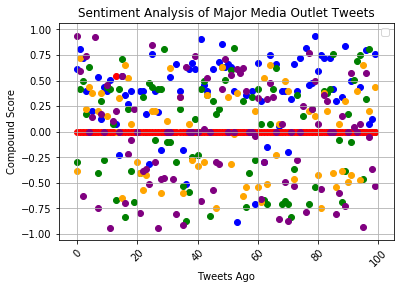

In [26]:
plt.scatter(x,bbc, color = 'blue')
plt.scatter(x,cnn, color = 'green')
plt.scatter(x,cbs, color = 'orange')
plt.scatter(x,fox, color = 'red')
plt.scatter(x,nyt, color = 'purple')
plt.xticks(rotation = 45)
plt.title('Sentiment Analysis of Major Media Outlet Tweets')
plt.xlabel("Tweets Ago")
plt.ylabel("Compound Score")
plt.grid(True)
plt.legend()
plt.savefig('Fig1')

In [27]:
polarity = df.groupby(['Name']).mean()["Compound"]
pd.DataFrame(polarity)

,Compound
Name,
BBC,0.310002
CBS News,-0.006982
CNN,0.034686
Fox News,0.005423
The New York Times,-0.033643


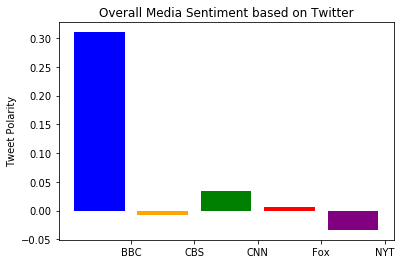

In [28]:
fig, ax = plt.subplots()
x = np.arange(len(polarity))
bbc = ax.bar(x[0], polarity[0], color = 'blue')
cbs = ax.bar(x[1], polarity[1], color = 'orange')
cnn = ax.bar(x[2], polarity[2], color = 'green')
fox = ax.bar(x[3], polarity[3], color = 'red')
nyt = ax.bar(x[4], polarity[4], color = 'purple')
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter")
ax.set_xticks(x + 0.5)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.grid(False)
plt.savefig('Fig2')

In [ ]:
#FoxNews does NOT put text in their tweets - only links to articles. Therefore VADER cannot assign a score